# House price analysis with Xshards on Orca

XShards in Orca allows the user to process large-scale dataset using existing Python codes in a distributed and data-parallel fashion, as shown below. This notebook is an example of comprehensive data exploration using Xshards on Orca. 

It is adapted from [Kagge Comprehensive data exploration with Python](https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python/notebook) notebook on house price analysis.


In [ ]:
# import necessary libraries
import bigdl.orca.data.pandas
from bigdl.dllib.nncontext import init_nncontext
from bigdl.orca.data.transformer import *
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data in a distributed way
ds_train = bigdl.orca.data.pandas.read_csv('../house_price/train.csv', nullValue="NA")

pyspark_submit_args is:  --driver-class-path /Users/guoqiong/opt/anaconda3/envs/py37tf2_x/lib/python3.7/site-packages/bigdl/share/core/lib/all-2.2.0-20220919.010507-1.jar:/Users/guoqiong/opt/anaconda3/envs/py37tf2_x/lib/python3.7/site-packages/bigdl/share/dllib/lib/bigdl-dllib-spark_3.1.3-2.2.0-SNAPSHOT-jar-with-dependencies.jar:/Users/guoqiong/opt/anaconda3/envs/py37tf2_x/lib/python3.7/site-packages/bigdl/share/orca/lib/bigdl-orca-spark_3.1.3-2.2.0-SNAPSHOT-jar-with-dependencies.jar pyspark-shell 
2022-11-14 18:30:06 WARN  NativeCodeLoader:62 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


2022-11-14 18:30:09,205 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-11-14 18:30:09,208 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-11-14 18:30:09,209 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-11-14 18:30:09,209 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
22-11-14 18:30:09 [Thread-3] INFO  Engine$:122 - Auto detect executor number and executor cores number
22-11-14 18:30:09 [Thread-3] INFO  Engine$:124 - Executor number is 1 and executor cores number is 4



User settings:

   KMP_AFFINITY=granularity=fine,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   OMP_NUM_THREADS=1

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_FORKJOIN_FRAMES=true
   KMP_FORKJOIN_FRAMES_MODE=3
   KMP_GTID_MODE=0
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_INIT_WAIT=2048
   KMP_ITT_PREPARE_DELAY=0
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NEXT_WAIT=1024
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_PATTERN=

22-11-14 18:30:09 [Thread-3] INFO  ThreadPool$:95 - Set mkl threads to 1 on thread 14
2022-11-14 18:30:09 WARN  SparkContext:69 - Using an existing SparkContext; some configuration may not take effect.
22-11-14 18:30:09 [Thread-3] INFO  Engine$:461 - Find existing spark context. Checking the spark conf...
cls.getname: com.intel.analytics.bigdl.dllib.utils.python.api.Sample
BigDLBasePickler registering: bigdl.dllib.utils.common  Sample
cls.getname: com.intel.analytics.bigdl.dllib.utils.python.api.EvaluatedResult
BigDLBasePickler registering: bigdl.dllib.utils.common  EvaluatedResult
cls.getname: com.intel.analytics.bigdl.dllib.utils.python.api.JTensor
BigDLBasePickler registering: bigdl.dllib.utils.common  JTensor
cls.getname: com.intel.analytics.bigdl.dllib.utils.python.api.JActivity
BigDLBasePickler registering: bigdl.dllib.utils.common  JActivity


## 1. Get general information of the data shards 

In [3]:
#check the decoration
ds_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
ds_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [5]:
# see the num of partitions of data shards
ds_train.num_partitions()


1

In [6]:
# count total records in the data_shards
ds_train.total_count()

1460

## 2. Analysing 'SalePrice'¶


In [7]:
ds_train.select("SalePrice").describe()

,summary,SalePrice
0,count,1460
1,mean,180921.19589041095
2,stddev,79442.50288288663
3,min,34900
4,max,755000


To generate plots on local for visualization, user can sample a fraction of the distribute sd data shards and concatenate all the pandas data frames in the rdd into a single pandas data frame to local, then users can examine the sampled data using traditional pandas related methods.  
0 < frac <= 1, here frac = 1.0 is chosen to show collect full data, then concate into a single local pandas data frame for visualization purpose. 
Just a few examples are shown in here.

In [8]:
sampled_ds = ds_train.sample(frac = 1.0)
sampled_pdf = sampled_ds.concat_to_pdf()


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

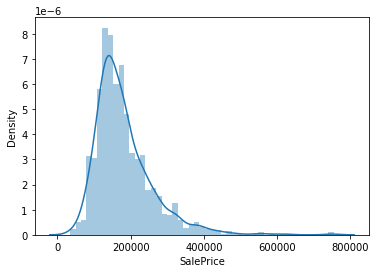

In [9]:
# histogram of 'SalePrice'
sns.distplot(sampled_pdf['SalePrice'])

Plot scatter plots to show relationship with numerical variables.

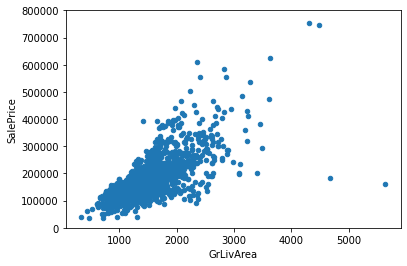

In [10]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([sampled_pdf['SalePrice'], sampled_pdf[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

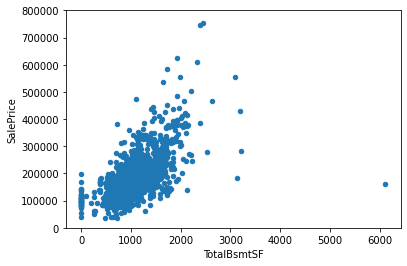

In [11]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([sampled_pdf['SalePrice'], sampled_pdf[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

Show relationship with categorical features¶

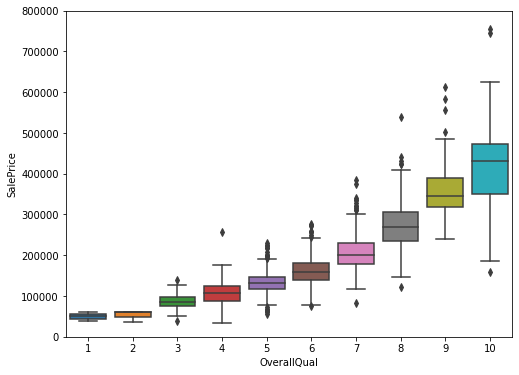

In [12]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([sampled_pdf['SalePrice'], sampled_pdf[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

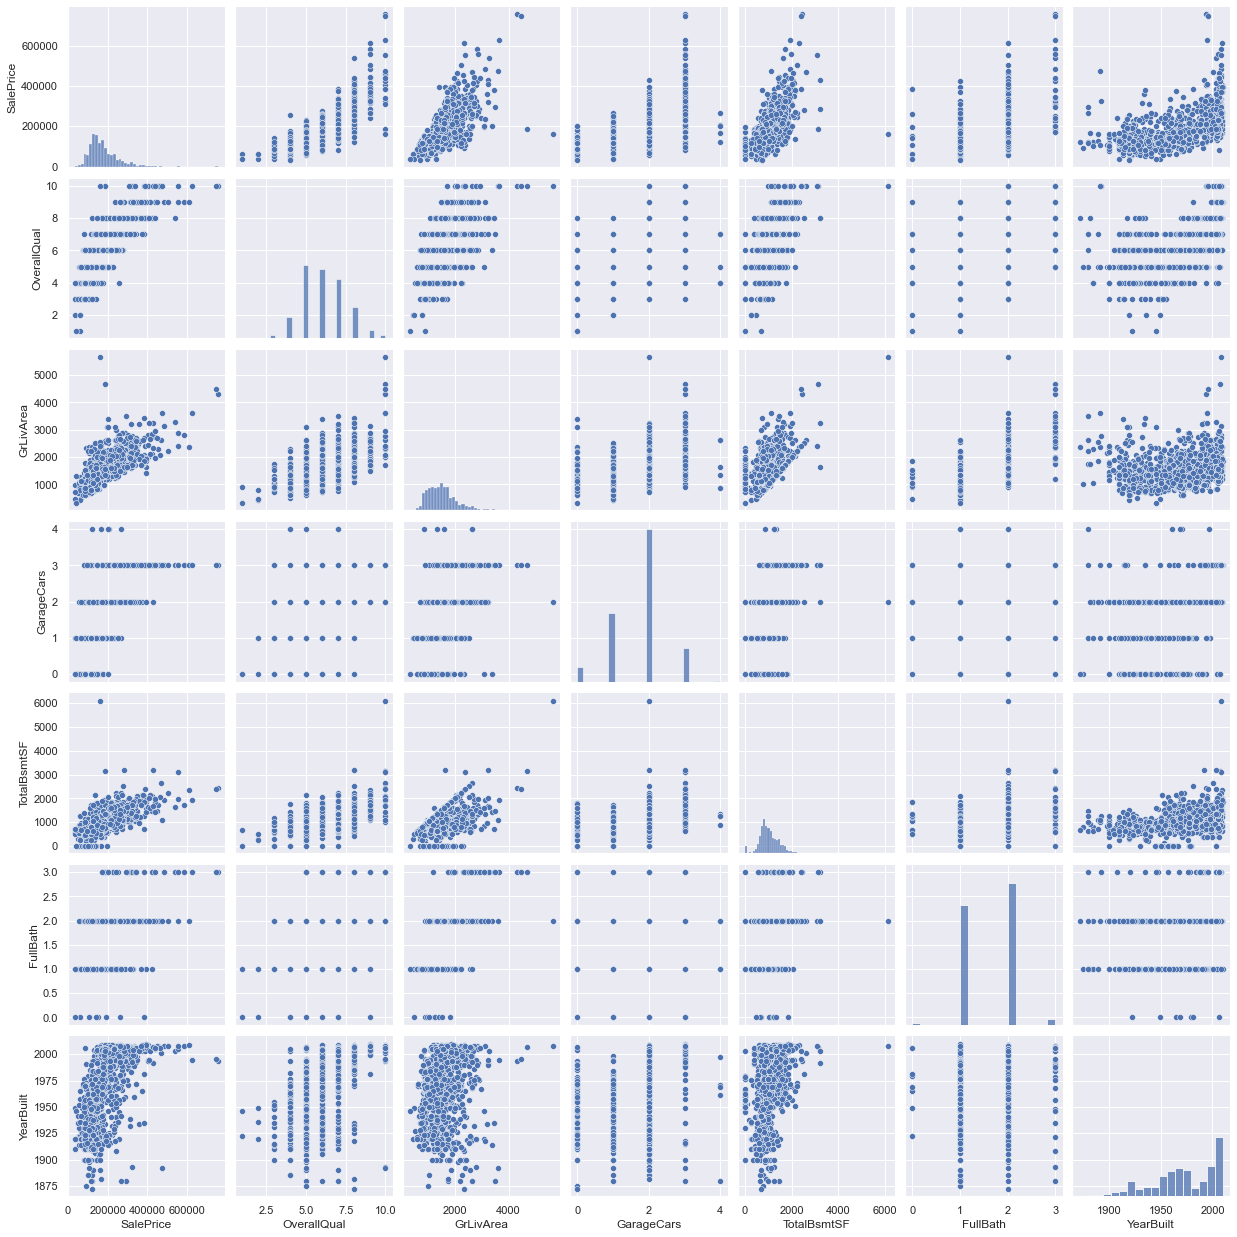

In [13]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(sampled_pdf[cols], size = 2.5)
plt.show();

## 3. Deal with missing data

It is important to understand the missing data. User can get the stats of full data shards on the cluster.

In [14]:
null_cnt_pdf = ds_train.get_null_sum().sort_values(by="total", ascending=False)
null_cnt_pdf["percent"] = null_cnt_pdf["total"] / ds_train.total_count()
null_cnt_pdf.head(20)

,col,total,percent
72,PoolQC,1453,0.995205
74,MiscFeature,1406,0.963014
6,Alley,1369,0.937671
73,Fence,1179,0.807534
57,FireplaceQu,690,0.472603
3,LotFrontage,259,0.177397
59,GarageYrBlt,81,0.055479
64,GarageCond,81,0.055479
58,GarageType,81,0.055479
60,GarageFinish,81,0.055479


Drop records which have missing data and evaluate results, `max_value` is count of missing data in a column, should be 0 is all missing data is dropped.

In [ ]:
#dealing with missing data
new_ds = ds_train.drop_missing_value()

# verify missing value has been removed
new_cnt_pdf = new_ds.get_null_sum()
max_value = new_cnt_pdf['total'].max()
max_value

## 4. Data transformation and feature engineering

Apply transformation on the data for feature engineering. Users can define transformation function and call `transform_shard` to do feature engineering. Here it showcases how to do a log transformation of 'SalePrice' and extact binary feature column of 'HasBsmt' using 'TotalBsmtSF' column.

In [16]:

def generate_new_sale_price(df):
    df['SalePrice'] = np.log(df['SalePrice'])
    return df
new_ds2 = new_ds.transform_shard(generate_new_sale_price)
new_ds2.select('SalePrice').head(20)

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216
5,11.870600
6,12.634603
7,12.206073
8,11.774520
9,11.678440


In [17]:
# create column for new variable (one is enough because it's a binary categorical feature)
def generate_HasBsmt(df):
    df['HasBsmt'] = 0
    df.loc[df['TotalBsmtSF'] > 0, 'HasBsmt'] = 1
    return df
new_ds3 = new_ds2.transform_shard(generate_HasBsmt)
new_ds3.select(['TotalBsmtSF', 'HasBsmt']).head(20)


,TotalBsmtSF,HasBsmt
0,856,1
1,1262,1
2,920,1
3,756,1
4,1145,1
5,796,1
6,1686,1
7,1107,1
8,952,1
9,991,1
